In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#PROBLEM
- Penjualan stagnan
- Meningkatkan penjualan di productline yang rendah pada setiap category

#Goals
- Memberikan solusi penjualan dengan merubah sistem membership
- Penjualan meningkat dengan seiring bertambahnya customer yang menjadi mebmer

In [60]:
df = pd.read_csv('Supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [61]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [127]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,1.993000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,0.835254
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,3.000000


In [62]:
# Null values checking
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [88]:
# Adding Column for analysis
df['Date'] = df['Date'].astype('datetime64')
date = df['Date'].dt
df['Month'] = date.month
df['Day'] = date.day_name()




In [89]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,Friday


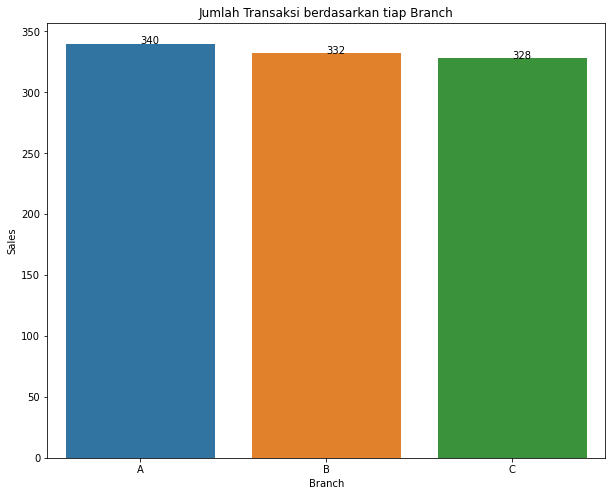

In [107]:
sales_branch = df[['Branch', 'Invoice ID']].groupby('Branch').agg('count').reset_index()
sales_branch.columns = ['Branch','Sales']
sales_branch

plt.figure(figsize = (10,8))
sns.barplot(x = sales_branch['Branch'], y= sales_branch['Sales'])
for index, value in enumerate(sales_branch['Sales']):
    plt.text(index, value, str(value))
plt.title('Jumlah Transaksi berdasarkan tiap Branch')
plt.show()


Branch A terletak di kota Yangon, Branch B terletak di kota Napyitaw, Branch C terletak di Mandalay. Ketiga kota tersebut terletak di Negara Myanmar.
Berdasarkan jumlah transaksi, ketiga branch tersebut memiliki jumlah transaksi yang tidak terpaut berbeda. 
Branch A : 340 Transaksi -> Tertinggi dari ketiga brand
Branch B : 332 Transaksi 
Branch C : 328 Transaksi -> Terendah

Berdasarkan data tersebut, kita mendapatkan gambaran bahwa performa dari ketiga brand tersebut jika disandingkan satu sama lain memiliki performa yang hampir sama, tidak ada perbedaaan yang sangat jauh. Jika terdapat perbedaan yang terpaut sangat jauh bisa dikatakan salah satu cabung tersebut 'Underperfomed' dibanding cabang-cabang lain. Namun terdapat banyak faktor yang dapat mempengaruhi branch yang 'Underperfomed'.

In [99]:
year_sales = df[['Month', 'Invoice ID', 'Branch']].groupby(['Month', 'Branch']).agg('count').reset_index()
year_sales.columns = ['Month', 'Branch', 'Sales']
A = year_sales[year_sales['Branch'] == 'A']
B = year_sales[year_sales['Branch'] == 'B']
C = year_sales[year_sales['Branch'] == 'C']
C


,Month,Branch,Sales
2,1,C,122
5,2,C,100
8,3,C,106


<Figure size 720x576 with 0 Axes>

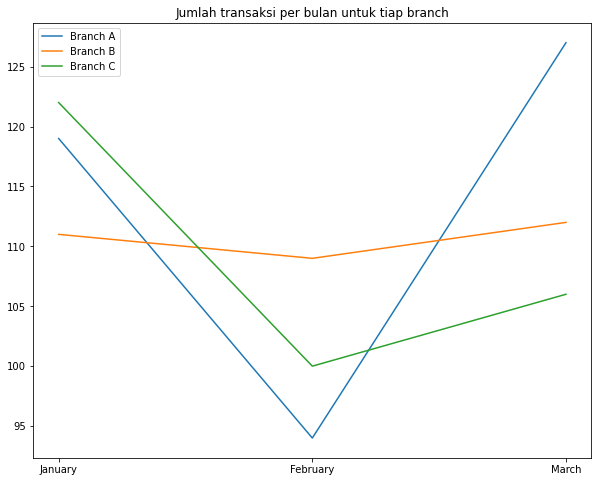

In [111]:
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(A['Month'], A['Sales'], label = 'Branch A')
ax.plot(B['Month'], B['Sales'], label = 'Branch B')
ax.plot(C['Month'], C['Sales'], label = 'Branch C')

plt.xticks(np.arange(1,4), labels = ['January', 'February', 'March'] )
plt.legend()
plt.title('Jumlah transaksi per bulan untuk tiap branch')
plt.show()




Untuk ketiga branch bulan februari adalah bulan dimana terjadi penurunan sales, dari grafik ke 3 branch tersebut trend nya hampir sama.
- Maka untuk analisa member 
    -> kita generalisir menggunakan 3 branch tersebut sebagai data acuan untuk memudahkan standarisasi ketiga cabang tersebut. 
    -> Setelah mendapatkan data acuan maka di analisa lebih dalam mana di product line mana customer member belanja
- Untuk analisa produk yang penjualan -> perlu dianalisa masing-masing branch untuk memaksimalkan profit

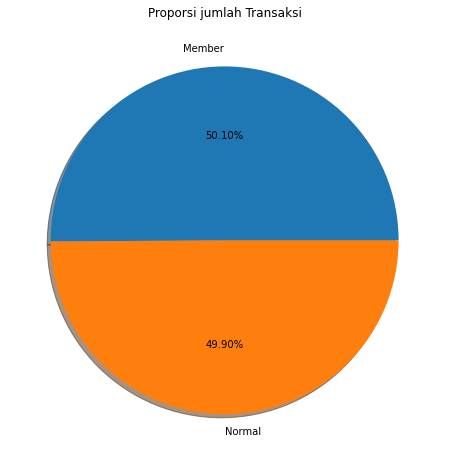

In [122]:
## Analisa member

loyalti = df[['Customer type', 'Invoice ID']].groupby('Customer type').agg('count').reset_index()
loyalti.columns = ['Customer type', 'Sales']

lyt = []
for i in loyalti['Sales']:
    lyt.append(i)
label = ['Member', 'Normal']
plt.figure(figsize=(10,8))
plt.pie(lyt, labels=label,
       shadow=True,
       textprops={
           'size' : 10,
           'color' : 'black'
       },
        autopct = '%1.2f%%',
       )
plt.title('Proporsi jumlah Transaksi')
plt.show()

Nilai proporsi yang berbelanja di ketiga supermarket hampir sama karena jumlahnya mendekati 50%.
- Perusahaan perlu untuk meningkatkan jumlah member: jika jumlah member meningkat maka customer yang loyal untuk berbelanja di supermarket kita akan meningkat. -> Bisa untuk meningkatkan penjualan

Kita perlu melihat dahulu apakah dengan mereka menjadi member akan meningkatkan penjualan apa tidak. Dari sini bisa menggunakan data historis di 3 bulan awal 2019 untuk mengetahui jumlah quantity yang mereka beli.

In [141]:
loyalti2 = df[['Customer type', 'Quantity']].groupby('Customer type').agg('sum').reset_index()
loyalti2.columns = ['Customer type', 'Quantity']


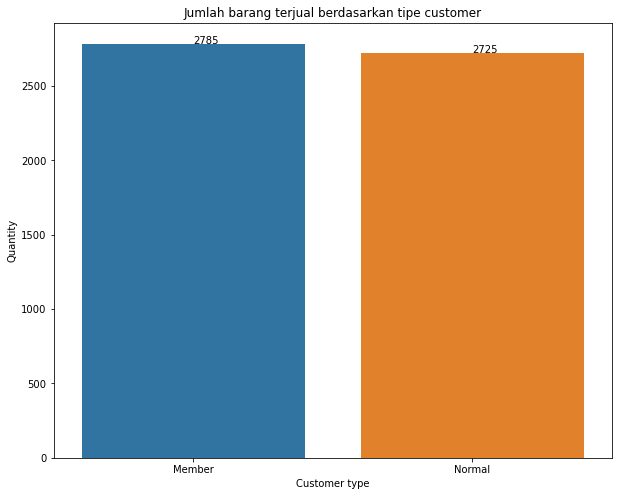

In [142]:
plt.figure(figsize = (10,8))
sns.barplot(x = loyalti2['Customer type'], y = loyalti2['Quantity'])
for index, value in enumerate(loyalti2['Quantity']):
    plt.text(index, value, str(value))
plt.title('Jumlah barang terjual berdasarkan tipe customer')
plt.show()

Berdasarkan data, setiap barang dari setiap kategori memiliki gross margin percentage yang sama maka dapat dikatakan jumlah quantity menentukan berapa profit dari supermarket. Semakin banyak jumlah quantity akan semakin tinggi gross profit nya berdasarkan tabel korelasi dibawah. Disini fokus supermarket perlu meningkatkan jumlah quantity barang yang terjual untuk memaksimalkan profit yang mereka dapatkan.

Jumlah barang yang terjual untuk member : 2785 sedangkan untuk non-member 2725. 
- Fitur 'Member' yang telah berjalan tidak meningkatkan jumlah barang yang dibeli oleh member secara signifikan
- Perusahaan perlu mengambil langkah-langkah untuk meningkatkan jumlah barang yang dibeli oleh member sehingga fitur 'member' pun bisa dikatakan efektif untuk meningkatkan penjualan supermarket



In [133]:
df[['cogs', 'gross income']].corr()

,cogs,gross income
cogs,1.0,1.0
gross income,1.0,1.0


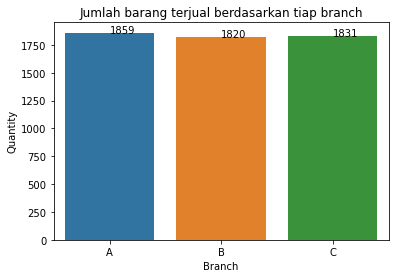

In [143]:
quant = df[['Quantity', 'Branch']].groupby('Branch').agg('sum').reset_index()
sns.barplot(x = quant['Branch'], y = quant['Quantity'])
for index, value in enumerate(quant['Quantity']):
    plt.text(index, value, str(value))
plt.title("Jumlah barang terjual berdasarkan tiap branch")
plt.show()

Berdasarkan data diatas, jumlah barang yg terjual tertinggi ada di BRANCH A. Namun jika dilihat dari jumlah barang yang terjual ketiga branch ini memiliki angka yang berdekatan satu sama lain.

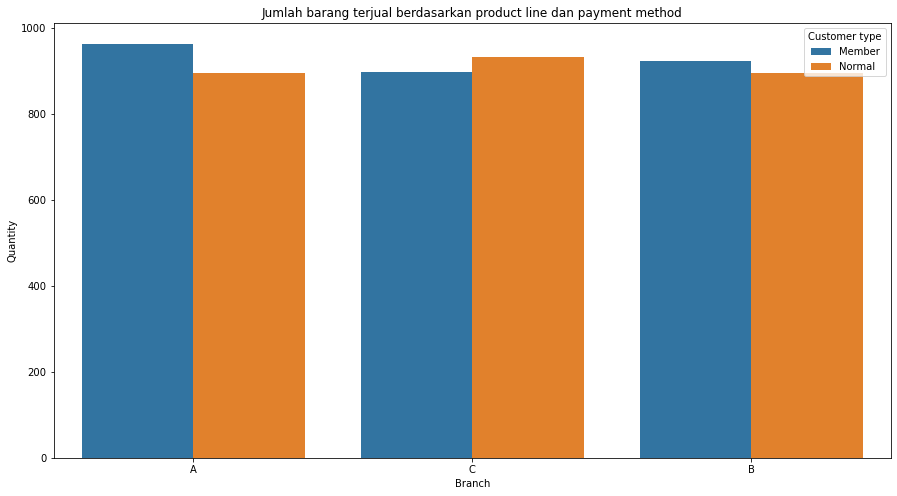

In [182]:
plt.figure(figsize= (15,8))
sns.barplot(x= df['Branch'],y=df['Quantity'],hue=df['Customer type'],ci=None,estimator=sum)
plt.title('Jumlah barang terjual berdasarkan branch dan customer type')
plt.show()

Member yang ada di branch A dan branch B lebih tinggi dari segi barang terjual nya dibanding kan non member. Namun menjadi catatan disini adalah di branch C justru lebih banyak customer yang non member berbelanja disana.
- BRANCH C:Non member > Member

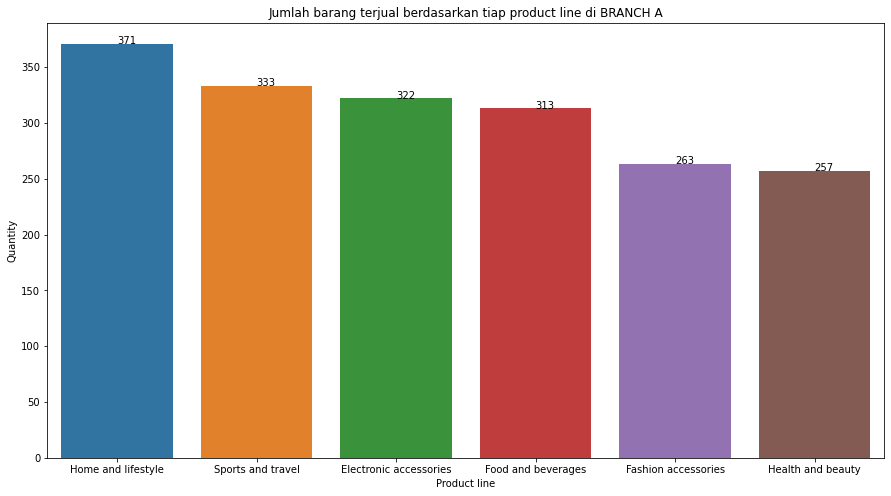

In [167]:
#Breakdown per branch

br_A = df[df['Branch']=='A']
groupA = br_A[['Product line', 'Quantity']].groupby('Product line').agg('sum').reset_index().sort_values('Quantity', ascending = False)
plt.figure(figsize= (15,8))
sns.barplot(x = groupA['Product line'], y = groupA['Quantity'])
for index, value in enumerate(groupA['Quantity']):
    plt.text(index, value, str(value))
plt.title("Jumlah barang terjual berdasarkan tiap product line di branch A")
plt.show()


# BRANCH A
Urutan penjualan dari tertinggi ke terendah
- Home and lifestyle
- Sports and travel
- Electronic Accessories
- Food and beverage
- Fashion Accessories
- Health and beauty


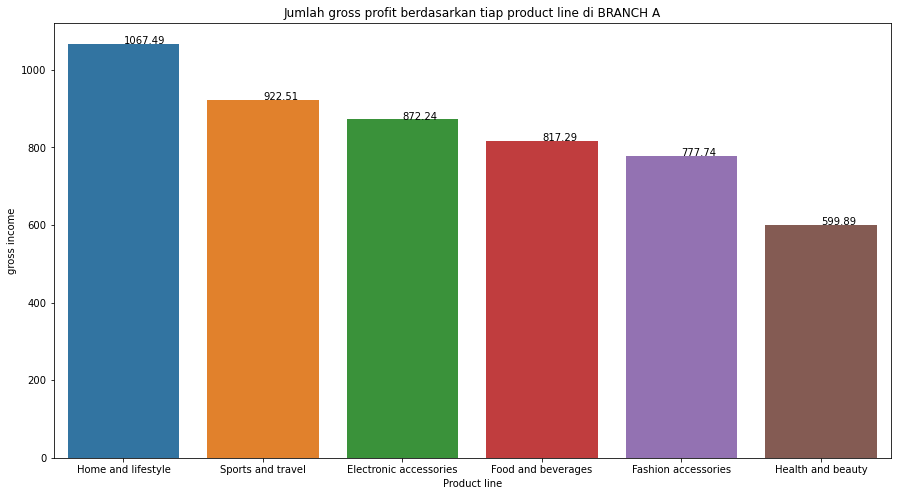

In [161]:
groupA2 = round((br_A[['Product line', 'gross income']].groupby('Product line').agg('sum')), 2).reset_index().sort_values('gross income', ascending = False)
plt.figure(figsize= (15,8))
sns.barplot(x = groupA2['Product line'], y = groupA2['gross income'])
for index, value in enumerate(groupA2['gross income']):
    plt.text(index, value, str(value))
plt.title("Jumlah gross profit berdasarkan tiap product line di BRANCH A")
plt.show()


Untuk setiap product line dikarenakan gross margin percentage nya sama, maka Home and Lifestyle lah yang memberikan profit terbanyak. Dan Health and beauty memberikan profit paling sedikit. gross profit/gross income berbanding lurus dengan jumlah quantity yang dijual.

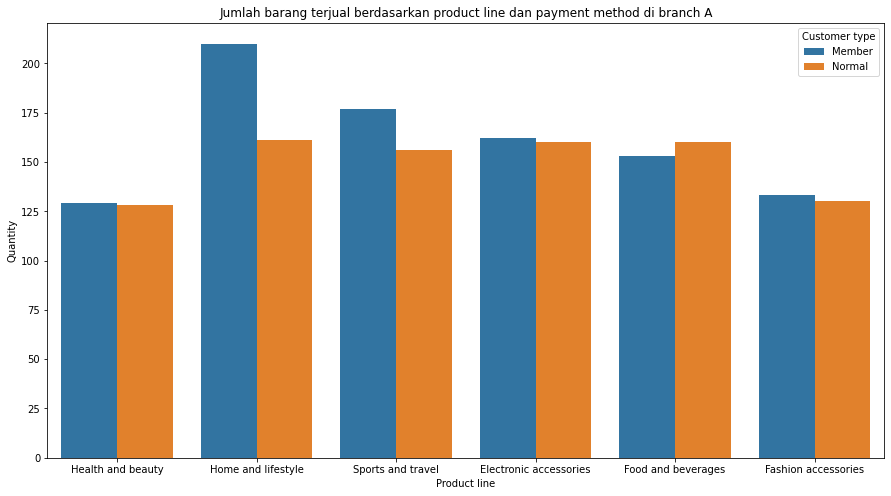

In [193]:
plt.figure(figsize= (15,8))
sns.barplot(x= br_A['Product line'],y=br_A['Quantity'],hue=br_A['Customer type'],ci=None,estimator=sum)
plt.title('Jumlah barang terjual berdasarkan product line dan payment method di branch A')
plt.show()

Customer yang terdaftar sebagai member banyak membeli di kategori
- home and lifestyle
- sports and travel
- electronic accessories
- fashion accessories

Customer non member membeli di:
- food and beverages
- fashion accessories

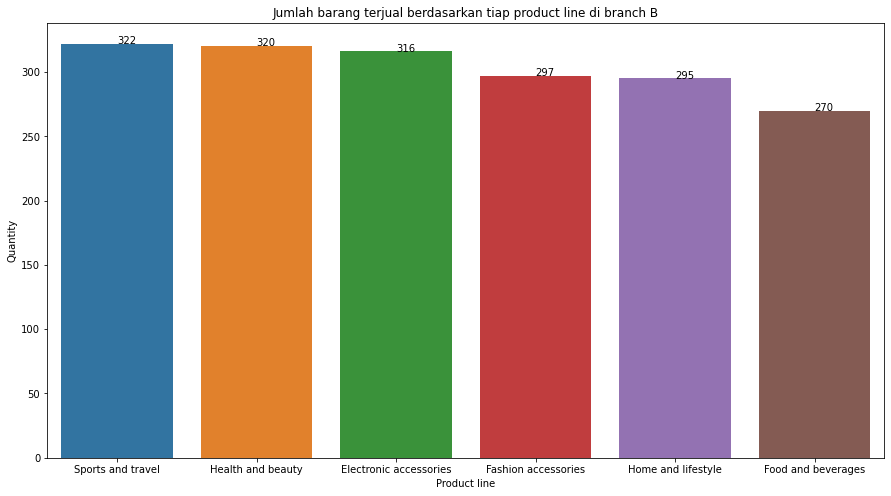

In [184]:
## BRANCH B
br_B = df[df['Branch']=='B']
groupB = br_B[['Product line', 'Quantity']].groupby('Product line').agg('sum').reset_index().sort_values('Quantity', ascending = False)
plt.figure(figsize= (15,8))
sns.barplot(x = groupB['Product line'], y = groupB['Quantity'])
for index, value in enumerate(groupB['Quantity']):
    plt.text(index, value, str(value))
plt.title("Jumlah barang terjual berdasarkan tiap product line di branch B")

plt.show()


# BRANCH B 
Urutan penjualan dari tertinggi ke terendah
- Sports and Travel
- Health and beauty
- Electronic accessories
- Fashion accessories
- Home and lifestyle
- food and beverages

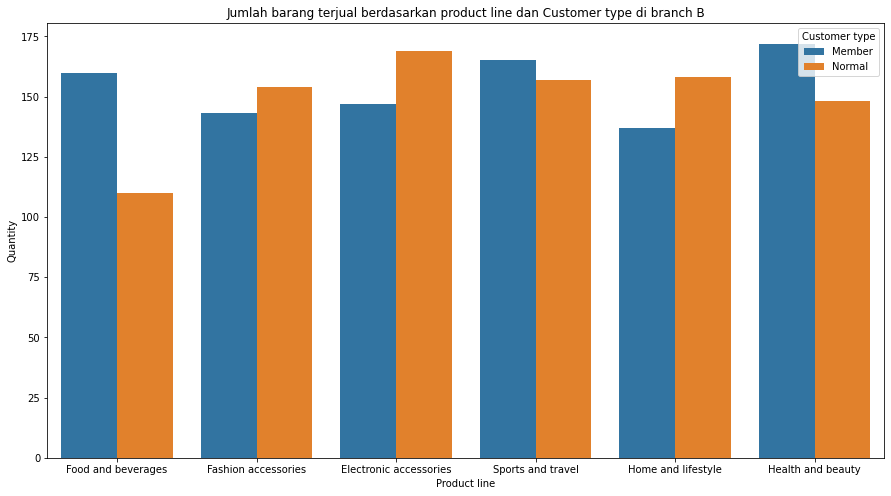

In [191]:
plt.figure(figsize= (15,8))
sns.barplot(x= br_B['Product line'],y=br_B['Quantity'],hue=br_B['Customer type'],ci=None,estimator=sum)
plt.title('Jumlah barang terjual berdasarkan product line dan Customer type di branch B')
plt.show()

Customer yang terdaftar sebagai member banyak membeli di kategori
- Food and beverages
- sports and travel
- Health and beauty

Customer non member membeli di:
- Fashion accessories
- Electronic Accessories
- Home and lifestyle

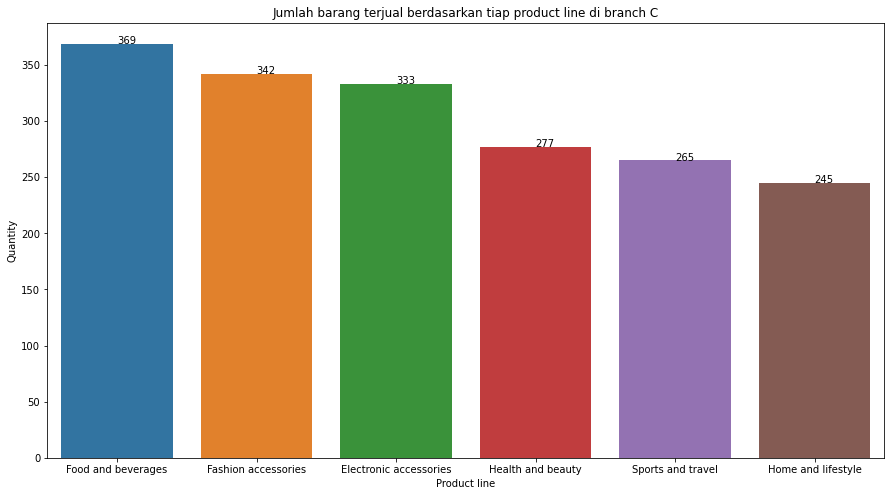

In [187]:
# BRANCH C
br_C = df[df['Branch']=='C']
groupC = br_C[['Product line', 'Quantity']].groupby('Product line').agg('sum').reset_index().sort_values('Quantity', ascending = False)
plt.figure(figsize= (15,8))
sns.barplot(x = groupC['Product line'], y = groupC['Quantity'])
for index, value in enumerate(groupC['Quantity']):
    plt.text(index, value, str(value))
plt.title("Jumlah barang terjual berdasarkan tiap product line di branch C")

plt.show()

In [ ]:
# BRANCH C
Urutan penjualan dari tertinggi ke terendah
- Food and beverages
- Fashion accessories
- Electronic accessories
- Health and beauty
- Sports and travel
- Home and lifestyle

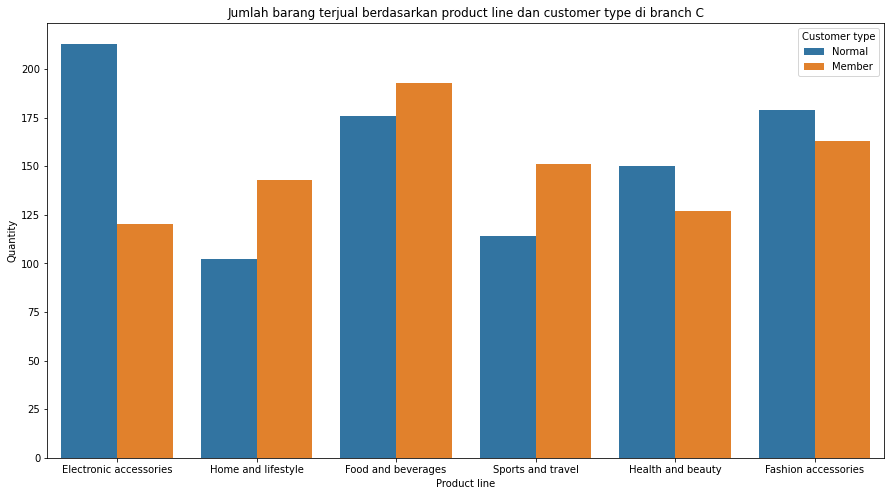

In [192]:
plt.figure(figsize= (15,8))
sns.barplot(x= br_C['Product line'],y=br_C['Quantity'],hue=br_C['Customer type'],ci=None,estimator=sum)
plt.title('Jumlah barang terjual berdasarkan product line dan customer type di branch C')
plt.show()

In [ ]:
Customer yang terdaftar sebagai member banyak membeli di kategori
- Electronic accessories
- Fashion accessories
- Health and beauty


Customer non member membeli di:
- home and lifestyle
- sports and travel
- food and beverages


# KESIMPULAN
Penjualan
- Performa dari ketiga branch tersebut jika disandingkan satu sama lain memiliki performa yang hampir sama, tidak ada perbedaaan yang sangat jauh
- Untuk ketiga branch bulan februari adalah bulan dimana terjadi penurunan sales, dari grafik ke 3 branch tersebut trend nya hampir sama. bisa dikarenakan faktor eksternal dan internal. Di bulan januari penjualan cenderung naik karena bertepatan dengan 'january effect' dimana para pekerja mendapatkan bonus gaji dari performa nya dalam setahun terakhir sehingga daya beli pun meningkat. 
- Perusahaan perlu untuk meningkatkan jumlah member: jika jumlah member meningkat maka customer yang loyal untuk berbelanja di supermarket kita akan meningkat. Dan turut berkontribusi besar terhadap naiknya penjualan.
- Fitur 'Member' yang telah berjalan karena berdasarkan data jumlah pembelian yang dilakukan oleh member hanya selisih 60 barang dengan barang yang dibeli oleh non member
- Perusahaan perlu mengambil langkah-langkah untuk meningkatkan jumlah barang yang dibeli oleh member sehingga fitur 'member' pun bisa dikatakan efektif untuk meningkatkan penjualan supermarket.
- Jumlah barang yg terjual tertinggi ada di BRANCH A. Namun jika dilihat dari jumlah barang yang terjual ketiga branch ini memiliki angka yang berdekatan satu sama lain.
- Member yang ada di branch A dan branch B lebih tinggi dari segi barang terjual nya dibanding kan non member. Namun menjadi catatan disini adalah di branch C justru lebih banyak customer yang non member berbelanja disana. Maka BRANCH C -> perlu lebih mempromosikan MEMBER CARD kepada customer karena jumlah yang NON MEMBER yang bertransaksi lebih banyak dibandingkan yang MEMBER

BRANCH A
- Product line dengan PROFIT paling tinggi adalah kategori Home and lifestyle dengan membership.
- Product line health and beauty menjadi product line dengan penjualan terendah dibanding product line lain meskipun mayoritas ynag membeli adalah membeerhsip
- Penjualan dari non member yang lebih tinggi dibanding penjualan dari membership ada di kategori food and beverages and fashion accessories.

BRANCH B
- Product line dengan PROFIT paling tinggi adalah Sports and Travel dengan membership.
- Product line food and beverages menjadi product line dengan penjualan terendah dibanding product line lain meskipun mayoritas yang membeli adlaah membership
- Penjualan dari non member yang nilainya lebih tinggi dibanding penjualan dari member ada di kategori home and lifestyle, electronic accessories, dan fashion accessories

BRANCH C
- Product line dengan PROFIT paling tinggi adalah food and beverages dengan non member.
- Product line home and lifestyle menjadi product line dengan penjualan terendah.
- Penjualan dari non member yang nilainya lebih tinggi dibanding penjualan dari member ada di kategori home and lifestyle, sports and travel, dan food and beverages

- Dari ketiga branch masing-masing berbeda dalam product line yang paling laku




In [209]:
df[(df['Month'] == 2) & (df['cogs'] < 50)][['Invoice ID']].count()

Invoice ID    24
dtype: int64

In [211]:
df[(df['Month'] == 2)][['cogs']].sum()

cogs    92589.88
dtype: float64

In [217]:
df[df['Month'] == 1][['Day', 'Quantity']].groupby('Day').agg('sum')

,Quantity
Day,
Friday,206
Monday,240
Saturday,303
Sunday,245
Thursday,305
Tuesday,365
Wednesday,301


# SARAN
- Pembenahan sistem membership -> memberikan 1 loyalti point untuk setiap belanja $50. 1 loyalti point bisa dikonversikan ke dollar senilai  $0.25 dan dapat diakumulasi. Customer loyal akan bertambah karena merasa diuntungkan dengan sistem membership ini.
  Contoh: diambil data pada bulan januari: 
  - cogs pada bulan januari -> $ 110754.16
  - cogs setelah member membeli dengan minimal $50 -> 92589.88 + 50(24) = $93789 ->  peningkatan : 1.3 % --> #sangat dipengaruhi oleh data customer yg membeli dibawah $50
  Meskipun peningkatannya sedikit dikarenakan jumlah data yg membeli dibawah 50$ hanya sedikit, namun akan sedikit 'memaksa' customer untuk membeli dengan jumlah yang lebih banyak Karena untuk supermarket semakin banyak produk dibeli maka semakin banyak profitnya dikarenakan untuk tiap barang memiliki profit margin yang sama. Semakin banyak uang yang dihabiskan pelanggan untuk membeli dari supermarket, semakin besar REWARD mereka -> semakin besar pula profit yang bisa supermarket dapatkan
 
- Penempatan barang perlu di maksimalkan untuk tiap branch. 
    contoh: BRANCH A, penjualan terendah ada di kategori health and beauty -> produk health and beauty diletakkan lebih dekat dengan pintu masuk dan didekat CASHIER

- BRANCH C : Karyawan BRANCH C harus selalu mempromosikan membership karena JUMLAH TRANSAKSI NON MEMBERSHIP lebih tinggi dibanding MEMBERSHIP
- Memberikan free sample 
    contoh : BRAND B produk terendah ada di food and beverages -> Karyawan dapat berkeliling untuk memberikan free sample untuk produk yang kurang laku. -> setelah program dilakukan perlu menimbang kembali SALES product line tersebut untuk menentukan apakah program berjalan efektif atau tidak

- Lakukan analisa terhadap barang yang penjualannya kurang:
    contoh : BRANCH A , penjualan terendah ada di kategori health and beauty -> cari root cause -> apakah target pasar tidak sesuai dengan daya beli masyarakat di kota tersebut
    BRANCH A - YANGON -> Yangon terletak jauh dari ibu kota namun yangon adalah kota terbesar di myanmar. Mengapa health and beauty tidak laku di supermarket yang terletak di yangon -> kemungkinan : kompetitor, produk , masyarakat, lifestyle, daya beli masyarakat
  